
scp simpol@ssh.computerome.dk:/home/projects/ku_00017/data/generated/currents/two_trend_ExpQuad_dict.pkl ~/Documents/Articles/conflict_prediction/data/computerome/


In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from utils import plot_predictions

In [2]:
pkl_file = open('/home/polichinel/Documents/Articles/conflict_prediction/data/computerome/two_trend_ExpQuad_sb_dict.pkl', 'rb')
ex_dict = pickle.load(pkl_file)
pkl_file.close()

In [3]:
dfs = list(ex_dict.keys())
dfs

['100_100_ged_best_sb_ExpQuad_map_df',
 '100_100_ged_best_sb_ExpQuad_mse_results_df',
 '100_100_ged_best_sb_ExpQuad_df_results',
 '100_100_ged_best_sb_ExpQuad_df_merged']

In [4]:
ex_dict[dfs[0]]

,Parameter,Value at MAP
0,ℓ_s,2.690505
1,η_s,0.524811
2,ℓ_l,35.397028
3,η_l,1.299853
4,σ,0.914836


In [5]:
ex_dict[dfs[1]]

,Gps,MSE insample (mean),MSE outsample (mean)
0,Full,0.712757,1.050419
1,Short,2.888988,2.897337
2,long,1.045859,1.043959


In [6]:
ex_dict[dfs[2]]

,Metrics,Train,Test
0,AUC,0.963739,0.820217
1,AP,0.964093,0.843553
2,BS,0.080982,0.188405


In [7]:
df_merged = ex_dict[dfs[3]]

In [8]:
df_merged['pg_id'].unique().shape

(6,)

In [9]:
df_merged.columns

Index(['mu', 'mu_s', 'mu_l', 'var', 'var_s', 'var_l', 'X', 'y', 'id', 'pg_id',
       'train', 'year', 'gwcode', 'xcoord', 'ycoord', 'ged_best_sb',
       'ged_best_ns', 'ged_best_os', 'ged_best', 'mu_slope', 'mu_acc',
       'mu_mass', 'mu_s_slope', 'mu_s_acc', 'mu_s_mass', 'mu_l_slope',
       'mu_l_acc', 'mu_l_mass'],
      dtype='object')

In [10]:
top1 = df_merged[df_merged['mu_l_mass'] == df_merged['mu_l_mass'].max()]['id'].values[0]
print(top1)

114868140


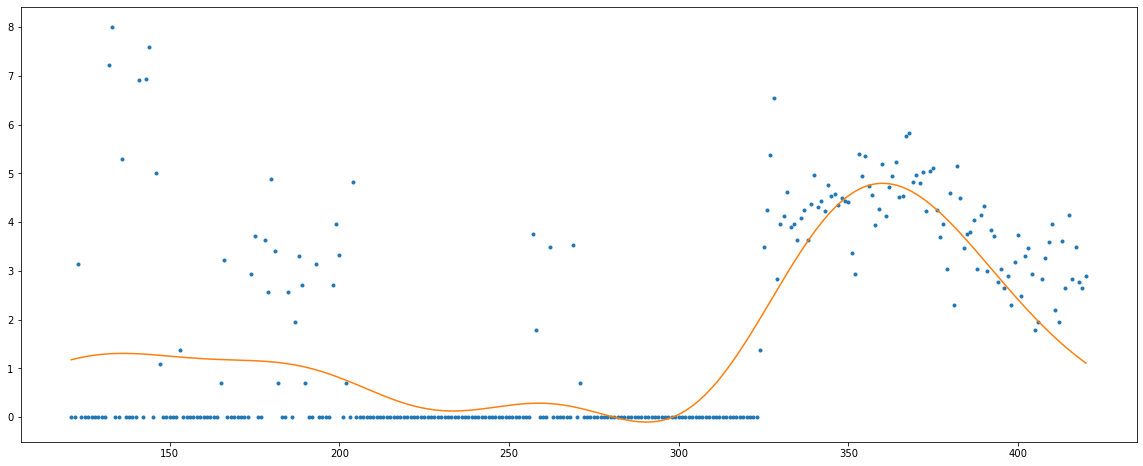

In [11]:
# nice with a simple plot to manipulate

# pg_id = df_merged[df_merged['id'] == 114867843]['pg_id'].values[0]
pg_id = df_merged[df_merged['id'] == top1]['pg_id'].values[0]

X = df_merged[df_merged['pg_id'] == pg_id]['X']
mu = df_merged[df_merged['pg_id'] == pg_id]['mu_l']
y = df_merged[df_merged['pg_id'] == pg_id]['y']

plt.figure(figsize = [20,8])

plt.plot(X, y, '.')
plt.plot(X, mu, '-')
plt.show()

Number of time lines plotted: 1


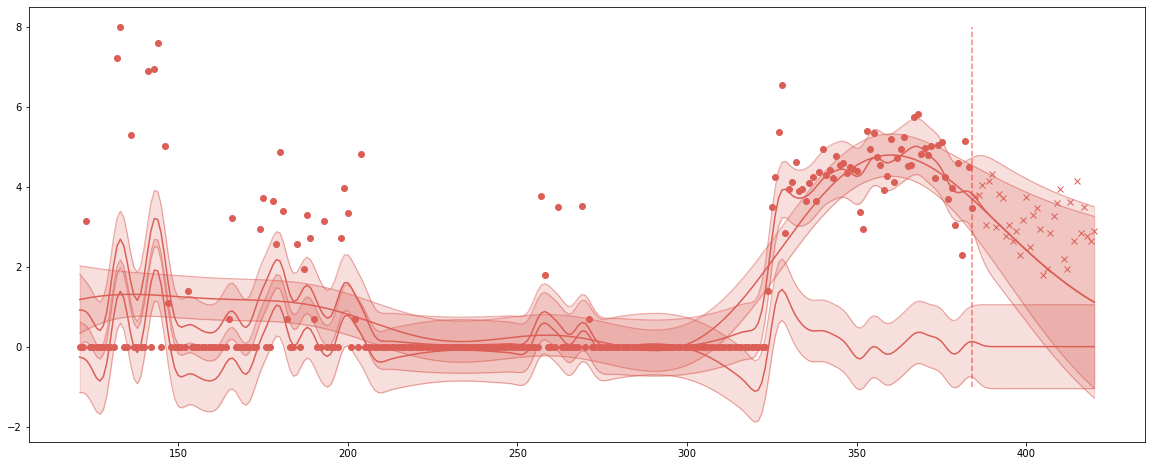

In [12]:
plot_predictions(df_merged[df_merged['pg_id'] == pg_id])